In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
#importing our cancer dataset
dataset = pd.read_csv("data.csv")
dataset.shape

(569, 33)

In [2]:
#as we don't have any use for the id column so we get rid of that
dataset.drop({'id','Unnamed: 32'},axis=1,inplace=True)
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#Formatting diagnosis column for m=1 and b=0
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
#to get a idea of dataset result of how much patients fall into m and b catogery
dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


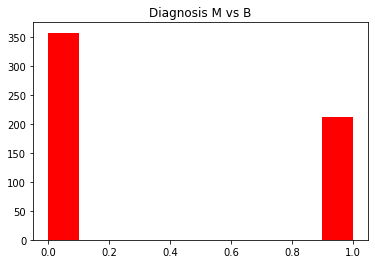

In [6]:
#visual representaion of the numeric value
plt.hist(dataset['diagnosis'],histtype='stepfilled',color=("red"),)
plt.title('Diagnosis M vs B')
plt.show()

In [7]:
#takinfg the features untill the main case neglecting the wrost case senario.
features_mean=list(dataset.columns[1:11])
# spliting the dataframe in two dataframe for comparison chart to analysis and visualise the dataset
dataset_M=dataset[dataset['diagnosis'] ==1]
dataset_B=dataset[dataset['diagnosis'] ==0]

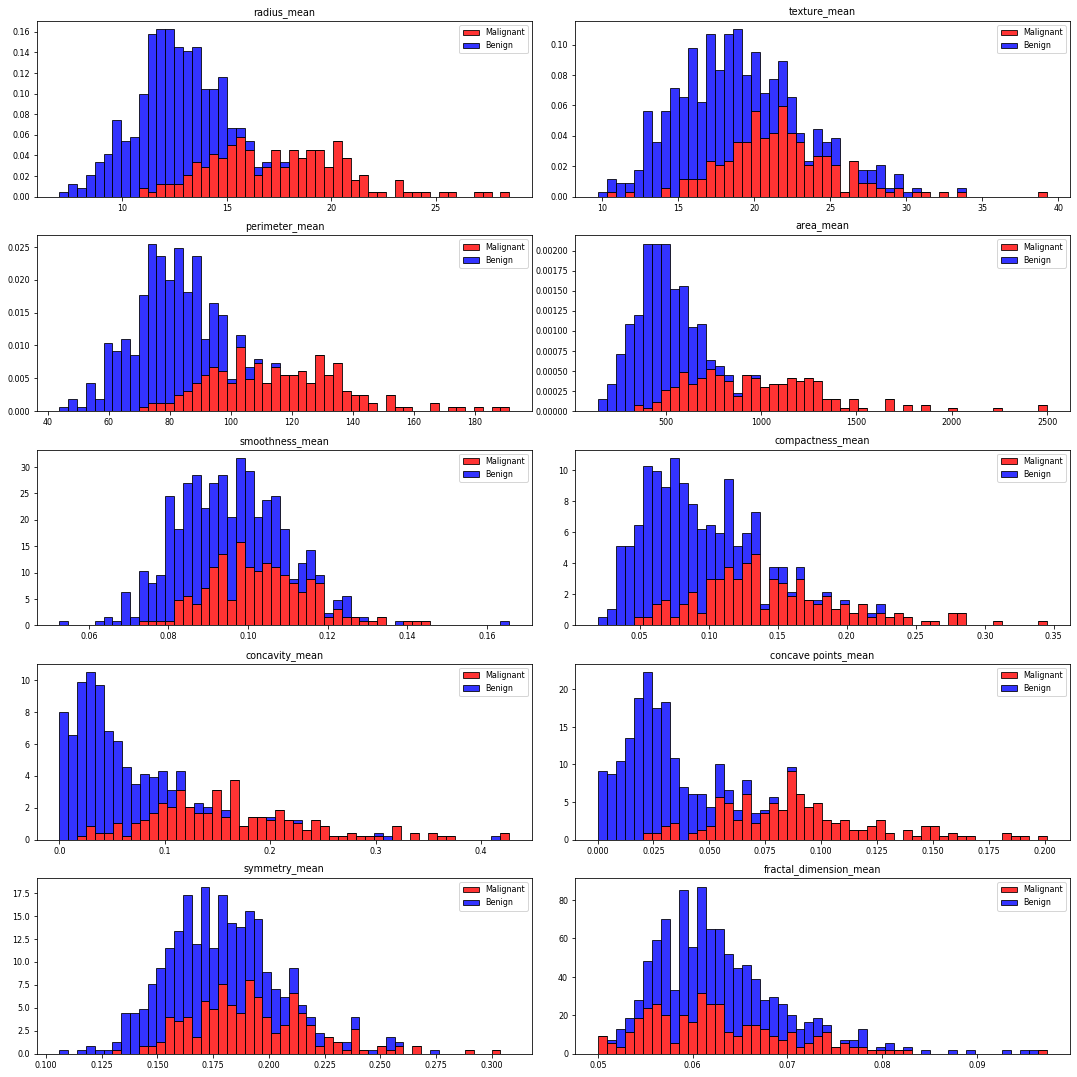

In [8]:
#updating the font size for the comparison chart
plt.rcParams.update({'font.size': 8})
#setting the size of the image that will be produced and the dta for the sub-plot betwenn the main plot
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.ravel()
#looping multiple subplots to establish a comparison histogram between M and B
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dataset[features_mean[idx]]) - min(dataset[features_mean[idx]]))/50
    ax.hist([dataset_M[features_mean[idx]],dataset_B[features_mean[idx]]], bins=np.arange(min(dataset[features_mean[idx]]), 
                                                                                          max(dataset[features_mean[idx]]) + binwidth, binwidth) ,
            alpha=0.8,stacked=True, density = True, label=['Malignant','Benign'],color=['red','blue'],edgecolor="black")
    #setting the place for label
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

#### 

### mean values of specifically these following that is:

>radius Mean

>perimeter Mean

>area Mean

>compactness Mean

>concavity Mean 

>concave Mean

These are thge following given sub plots or graph whose data can be used in classification of the breast cancer in the model because the heiger plot or i say the larger values of these parameters coinside in such a way that is represents a clear relation with malignant tumors present.

### IN other subplots there isn't a clear prefrence for malignant and benign and there isn't any visible outlier that can cause a data fluctuation so there is no need for further clean up of data

# BUT I AM USING ALL THE PROVIDED DATA FOR TRAINING NOT THE ONCE THAT CAN ACTUALLY DEFINE THE TUMOR MORE SPECIFICALLY FOR MORE BROAD ANALYSIS

In [129]:
#extracting feature metrix and response vector
X = dataset.iloc[:, 1:11].values
y = dataset.iloc[:, 0].values

In [357]:
#diving the datset now in training and testing datasets where ration is training 70% and testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# USING K NEIGHBORS CLASSIFIER

In [131]:
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
pred_train_knc=knc.predict(X_train)
pred_test_knc=knc.predict(X_test)
print("training score:",accuracy_score(y_train,pred_train_knc))
print("Testing Score:",accuracy_score(y_test,pred_test_knc))
print("\n")
print("confusion metrix:\n")
confusion_matrix(y_train,pred_train_knc)


training score: 0.9045226130653267
Testing Score: 0.9064327485380117


confusion metrix:



array([[245,   9],
       [ 29, 115]], dtype=int64)

***
<img sty src="images_detail/cm.png" style="width:400px"/>

***

total according to above confusion matrix = 245+29+115+9 = 398

- Accuracy: Overall, how often is the classifier correct?
    >(TP+TN)/total = (245+115)/398 = 0.90
    
- Misclassification Rate: Overall, how often is it wrong?
>(FP+FN)/total = (29+9)/398 = 0.09<br>
=> equivalent to 1 minus Accuracy<br>
=> also known as "Error Rate"

- True Positive Rate: When it's actually yes, how often does it predict yes?
>TP/actual yes = 115/144 = 0.79<br>
=>also known as "Sensitivity" or "Recall"<br>

- False Positive Rate: When it's actually no, how often does it predict yes?
>FP/actual no = 9/254 = 0.03<br>

- True Negative Rate: When it's actually no, how often does it predict no?
>TN/actual no = 245/254 = 0.96<br>
=>equivalent to 1 minus False Positive Rate<br>
=>also known as "Specificity"<br>

- Precision: When it predicts yes, how often is it correct?
>TP/predicted yes = 115/124 = 0.92<br>

- Prevalence: How often does the yes condition actually occur in our sample?
>actual yes/total = 144/398 = 0.36

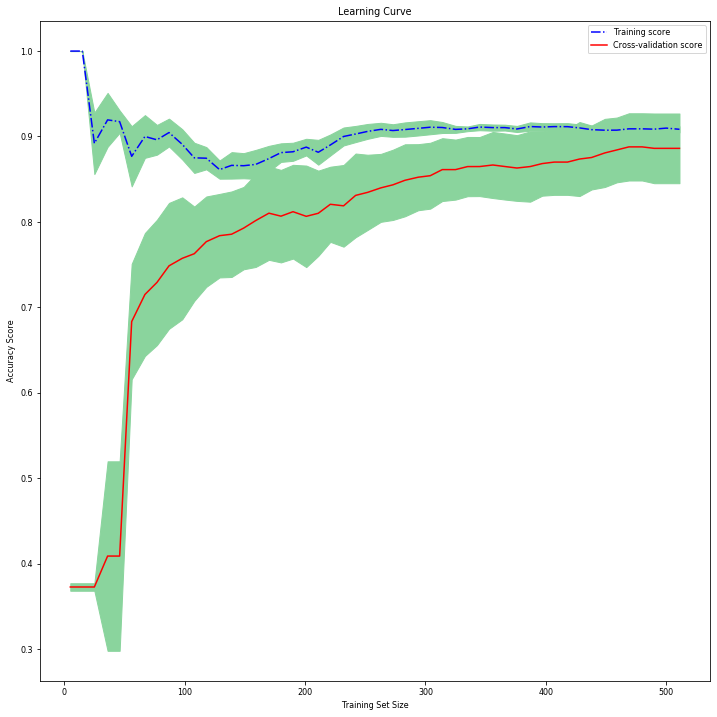

In [133]:
#ploting learning graph for the give traing and testing set for decision tree
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(knc, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '-.', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#8ad49d")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#8ad49d")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()






# using logistic regression

In [460]:
log=LogisticRegression(solver='lbfgs',max_iter=150)
log.fit(X_train,y_train)
pred_train=log.predict(X_train)
pred_test=log.predict(X_test)
print("Training Score:",accuracy_score(y_train,pred_train))
print("Testing Score:",accuracy_score(y_test,pred_test))
print("\n")
print("confusion metrix:\n")
confusion_matrix(y_train,pred_train)

Training Score: 0.9095477386934674
Testing Score: 0.9122807017543859


confusion metrix:



array([[234,  15],
       [ 21, 128]], dtype=int64)

# using decision tree

In [358]:
dtc=DecisionTreeClassifier(splitter="best")
dtc.fit(X_train,y_train)
pred_train=dtc.predict(X_train)
pred_test=dtc.predict(X_test)
print("Training Score:",accuracy_score(y_train,pred_train))
print("Testing Score:",accuracy_score(y_test,pred_test))
print("\n")
print("confusion metrix:\n")
confusion_matrix(y_train,pred_train)

Training Score: 1.0
Testing Score: 0.9064327485380117


confusion metrix:



array([[249,   0],
       [  0, 149]], dtype=int64)

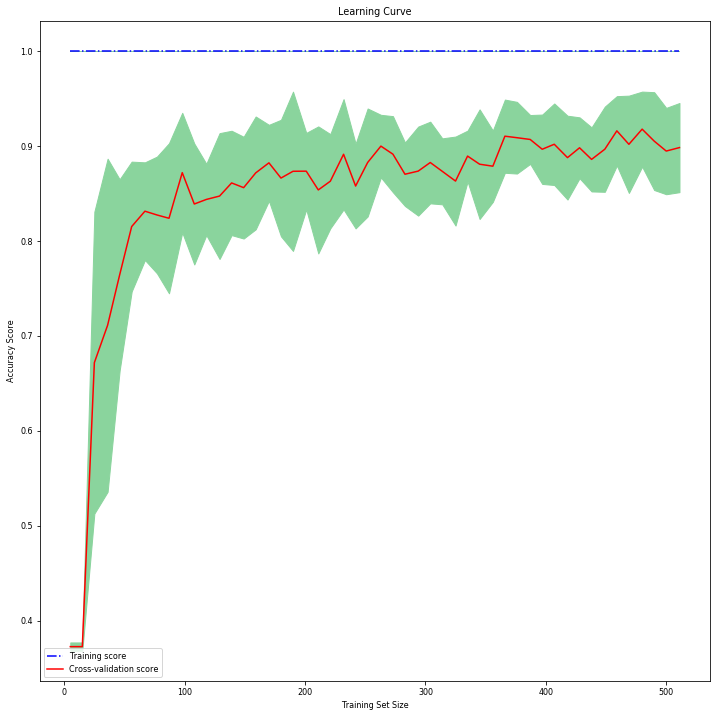

In [136]:
#ploting learning graph for the give traing and testing set for 
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '-.', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#8ad49d")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#8ad49d")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# using random forest

In [461]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=22,random_state=90)
rfc.fit(X_train,y_train)
pred_train=rfc.predict(X_train)
pred_test=rfc.predict(X_test)
print("Training Score:",accuracy_score(y_train,pred_train))
print("Testing Score:",accuracy_score(y_test,pred_test))
print("\n\n")

#rfc score prediction
print("rfc Training Score:",rfc.score(X_train,y_train))
print("rfc Testing Score:",rfc.score(X_test,y_test))
print("\n")
print("confusion metrix:\n")
confusion_matrix(y_train,pred_train)

Training Score: 1.0
Testing Score: 0.9532163742690059



rfc Training Score: 1.0
rfc Testing Score: 0.9532163742690059


confusion metrix:



array([[249,   0],
       [  0, 149]], dtype=int64)

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '-.', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#8ad49d")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#8ad49d")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# After implanting these model
>As the result it is visible that random forest classifier is giving us the most optimum result so we will use random forest as our final model

In [462]:
def predict_model(data):
    main=rfc.predict(data)
    if main==1:
        print("maligent")
    else:
        print("benign")

In [463]:
#pass the input as 2d vector as in [[-------------]]
predict_model([[13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811]])

benign
